## Лабораторна робота 4. **REGRESSION** 📈

# Опис вибірки "Motorbike Ambulance Calls"


Аварії за участю мотоциклів та відповідні виклики швидкої допомоги сильно залежать від екологічних та сезонних умов, таких як погодні умови, опади, день тижня, сезон, година дня тощо. Дані збирались протягом двох років щогодини та потім співвідносилися з відповідною погодою та сезонністю.

Основні характеристики вибірки `motorbike_ambulance_calls.csv`:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `motorbike_ambulance_calls.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. окремо вивести максимальні та мінімальні значення по всім змінним;  
5. вивести розмірність датасету;

In [241]:
import pandas as pd
import numpy as np
import scipy as sc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [242]:
def get_data(data_path: str):
    data = pd.read_csv(data_path)
    return data

In [243]:
data = get_data(data_path='motorbike_ambulance_calls.csv')

print("Basic statistical information:")
print(data.describe())

print("\nMaximal values:")
print(data.max())

print("\nMinimal values:")
print(data.min())

print("\nShape:")
print(data.shape)

Basic statistical information:
            index            yr          mnth            hr       holiday  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      0.502561      6.537775     11.546752      0.028770   
std     5017.0295      0.500008      3.438776      6.914405      0.167165   
min        1.0000      0.000000      1.000000      0.000000      0.000000   
25%     4345.5000      0.000000      4.000000      6.000000      0.000000   
50%     8690.0000      1.000000      7.000000     12.000000      0.000000   
75%    13034.5000      1.000000     10.000000     18.000000      0.000000   
max    17379.0000      1.000000     12.000000     23.000000      1.000000   

            weekday    workingday    weathersit          temp         atemp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       3.003683      0.682721      1.425283      0.496987      0.475775   
std        2.005771      0.465431     

**Завдання 2** перевірити типи даних та перевірте кількість даних по кожній змінній.

In [244]:
print("Data types for each variable:")
print(data.dtypes)

print("\nNumber of non-empty values ​​for each variable:")
print(data.count())

Data types for each variable:
index           int64
date           object
season         object
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

Number of non-empty values ​​for each variable:
index         17379
date          17379
season        17379
yr            17379
mnth          17379
hr            17379
holiday       17379
weekday       17379
workingday    17379
weathersit    17379
temp          17379
atemp         17379
hum           17379
windspeed     17379
cnt           17379
dtype: int64


**Завдання 3** пепевірте всі змінні на наявність пропусків.

In [245]:
print("The number of missing values ​​for each variable:")
print(data.isnull().sum())

The number of missing values ​​for each variable:
index         0
date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


**Висновки з 1-3 завдання (детальні)**

1. Пропущених значень немає.
2. Велике різноманіття кількості викликів (видно по середньоквадратичному відхиленню).
3. Метод describe() показав, що змінні коректно нормалізовані.

**Завдання 4** перетворіть змінну `date` в **date type**. Визначте часові межі датасету.

In [246]:
def tranform_date(df: pd.DataFrame, date_col_name: str):
    df[date_col_name] = pd.to_datetime(df[date_col_name])
    return df
  
data = tranform_date(data, 'date')

C:\Users\e\AppData\Local\Temp\ipykernel_11320\365046296.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_col_name] = pd.to_datetime(df[date_col_name])


In [247]:
def get_time_limits(df: pd.DataFrame, date_col_name: str):
    first_day = df[date_col_name].min()
    last_day = df[date_col_name].max()
    print(f"First day of dataset - {first_day}.\nLast day of dataset - {last_day}")
  
get_time_limits(data, 'date')

First day of dataset - 2011-01-01 00:00:00.
Last day of dataset - 2012-12-31 00:00:00


Висновок: дані насправді перебувають в межах 2011-2012 років.

#Аналіз категоріальних змінних

**Завдання 5** виділити категоріальні змінні в окремий датасет







In [248]:
categorical_columns = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
data_categorical = data[categorical_columns].copy()

**Завдання 6** перетворіть змінну `season` в числову шкалу.

In [249]:
def encode_season(df: pd.DataFrame, season_col_name: str):
    le = LabelEncoder()
    df[season_col_name] = le.fit_transform(df[season_col_name]) + 1
    return df

  
data = encode_season(data, 'season')
data_categorical = encode_season(data_categorical, 'season')

**Завдання 7** побудувати графіки `countplot` по всім категоріальним змінним

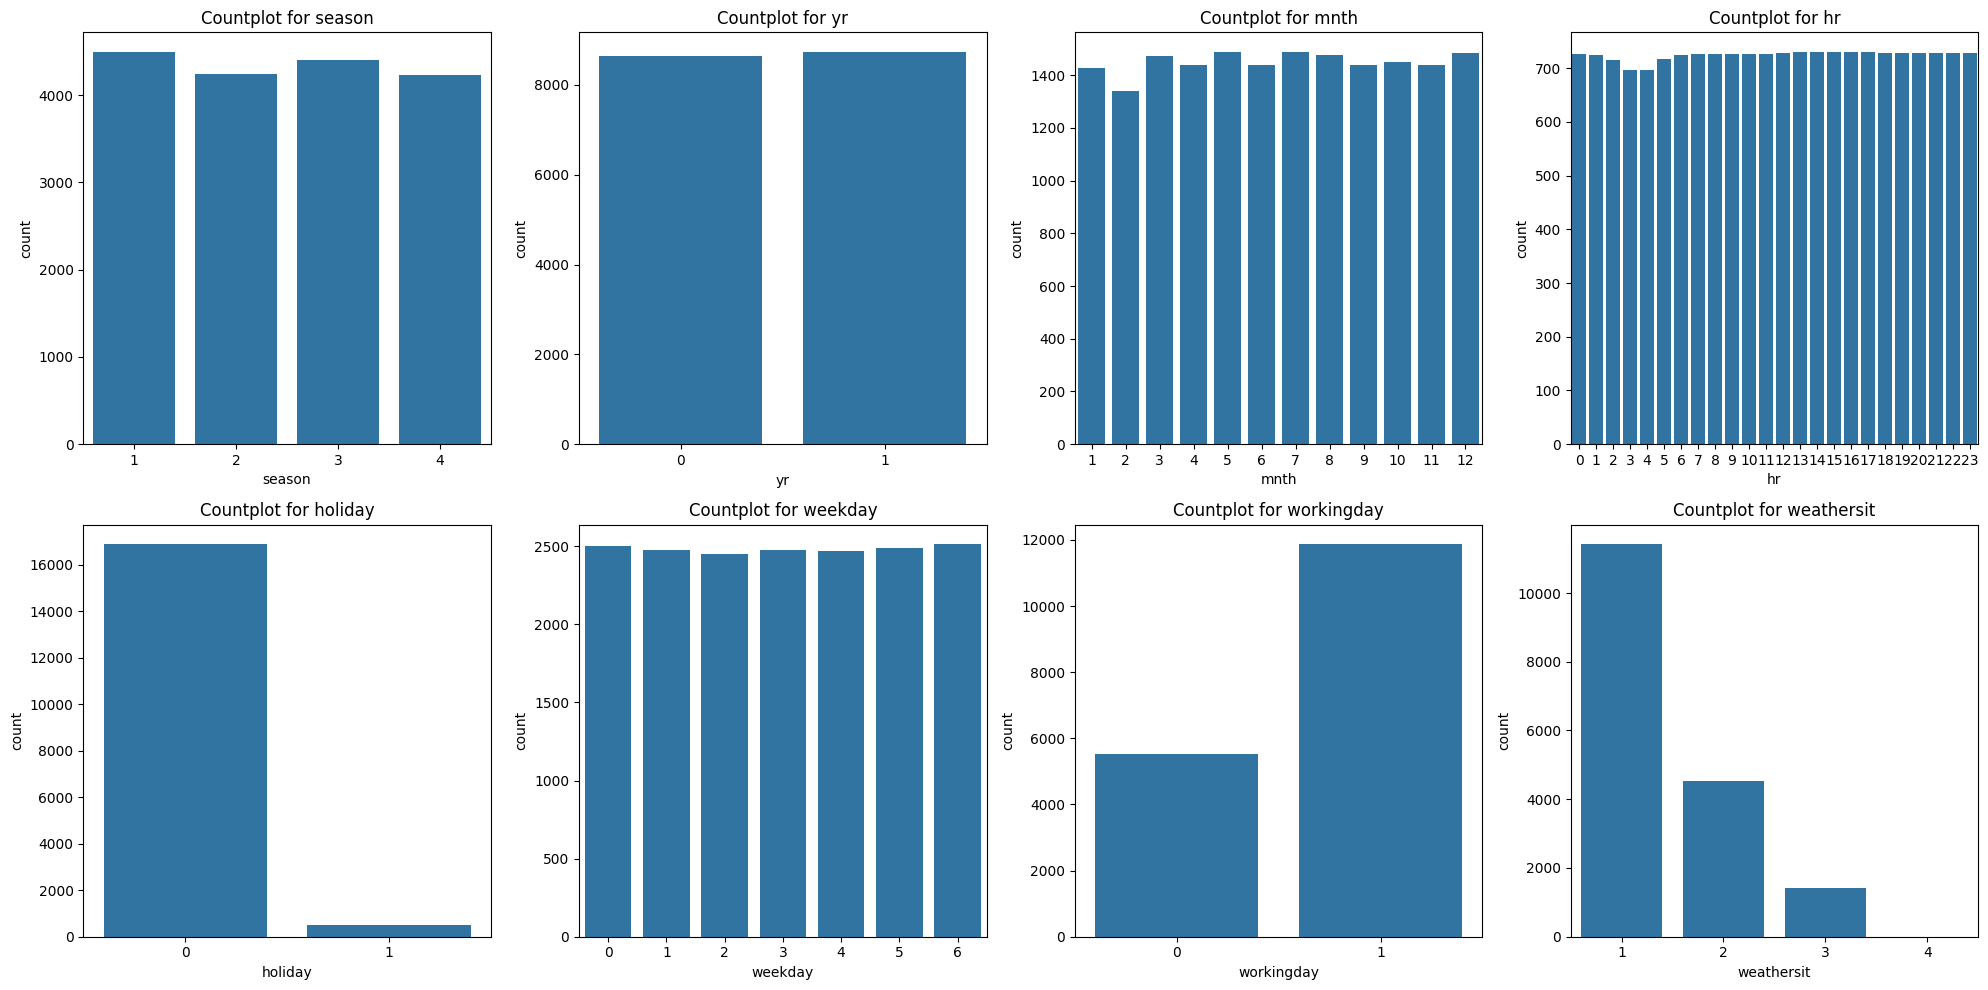

In [250]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))

for variable, subplot in zip(categorical_columns, ax.flatten()):
    sns.countplot(x=variable, data=data, ax=subplot)
    subplot.set_title(f'Countplot for {variable}')

    ticks = subplot.get_xticks()
    subplot.set_xticks(ticks)
    subplot.set_xticklabels(subplot.get_xticklabels(), rotation=0)
    
plt.tight_layout()
plt.show()

**Висновки з 5-7 завдання (детальні)**

1. Приблизно рівний розподіл для більшості змінних.
2. За 3-4 години ночі записів дещо менше, ніж за інші, що обумовлено більш розрідженим рухом на дорогах.
3. Аномалії відсутні.



#Аналіз числових змінних

**Завдання 8** виділити числові змінні в окремий датасет

In [251]:
numerical_columns = ['temp', 'atemp', 'hum', 'windspeed'] # без цільової змінної count
data_numerical = data[numerical_columns].copy()

**Завдання 9** побудуйте гістограми розподілу по всім числовим змінним

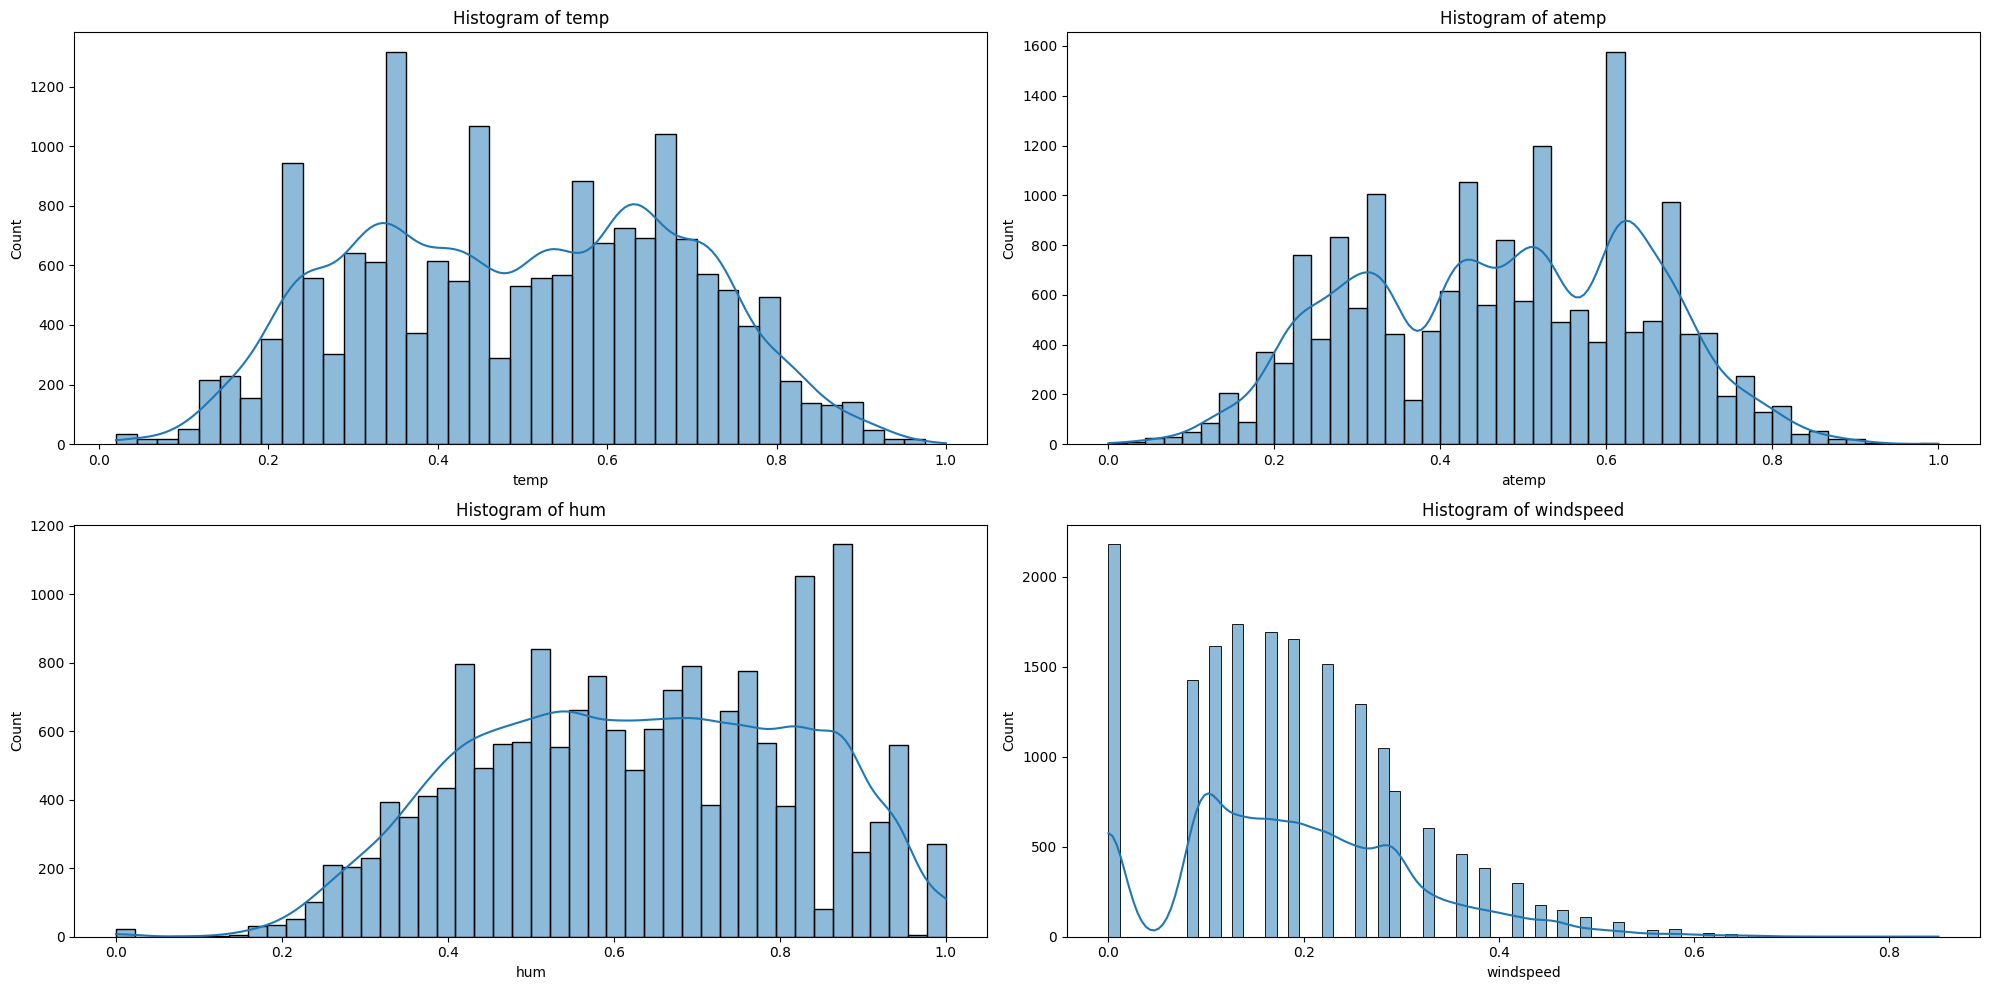

In [252]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))

for variable, subplot in zip(data_numerical.columns, ax.flatten()):
    sns.histplot(data_numerical[variable], kde=True, ax=subplot)
    subplot.set_title(f'Histogram of {variable}')

plt.tight_layout()
plt.show()

**Завдання 10** побудуйте гістограму розподілу цільової змінної та розрахуйте коефіціент нахилу

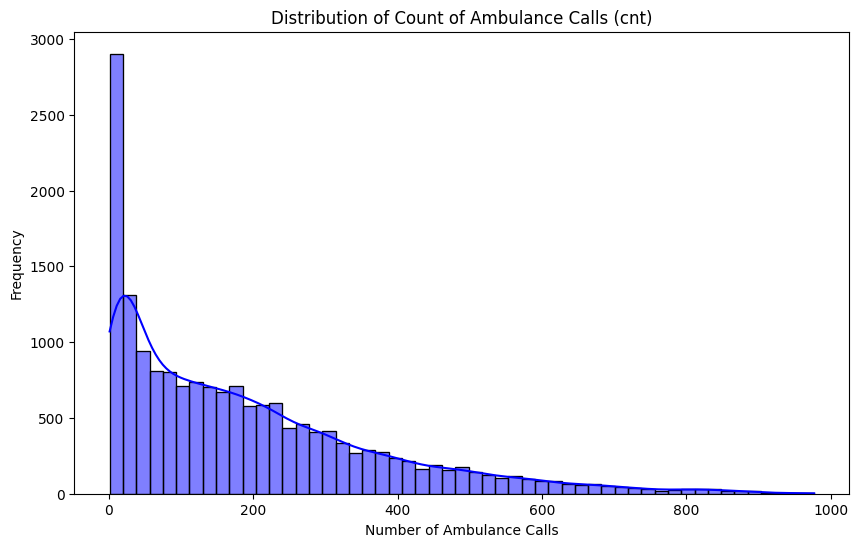

Skewness of the 'cnt' variable: 1.2773013463494975


In [253]:
plt.figure(figsize=(10, 6))
sns.histplot(data['cnt'], kde=True, color='blue')
plt.title('Distribution of Count of Ambulance Calls (cnt)')
plt.xlabel('Number of Ambulance Calls')
plt.ylabel('Frequency')
plt.show()

cnt_skewness = skew(data['cnt'])
print(f"Skewness of the 'cnt' variable: {cnt_skewness}")

**Висновки з 8-10 завдання (детальні)**

1. Графіки atemp і temp дуже схожі, оскільки atemp зазвичай незначно відрізняється від temp.
2. Розподіл швидкості вітру нагадує нормальний.
3. Розподіл кількості викликів нагадує показниковий, а також має коефіцієнт асиметрії 1.27: права асиметрія, довший хвіст з правого боку (більші значення розподілу мають більшу частоту).
4. Є аномалії у вигляді надзвичайно великої кількості викликів.



#Аналіз взаємозв'язків між числовими і категоріальними змінними

**Завдання 11** побудуйте графіки співвідношення `scatterplot` між всіма числовими змінними і цільовою змінною `cnt`

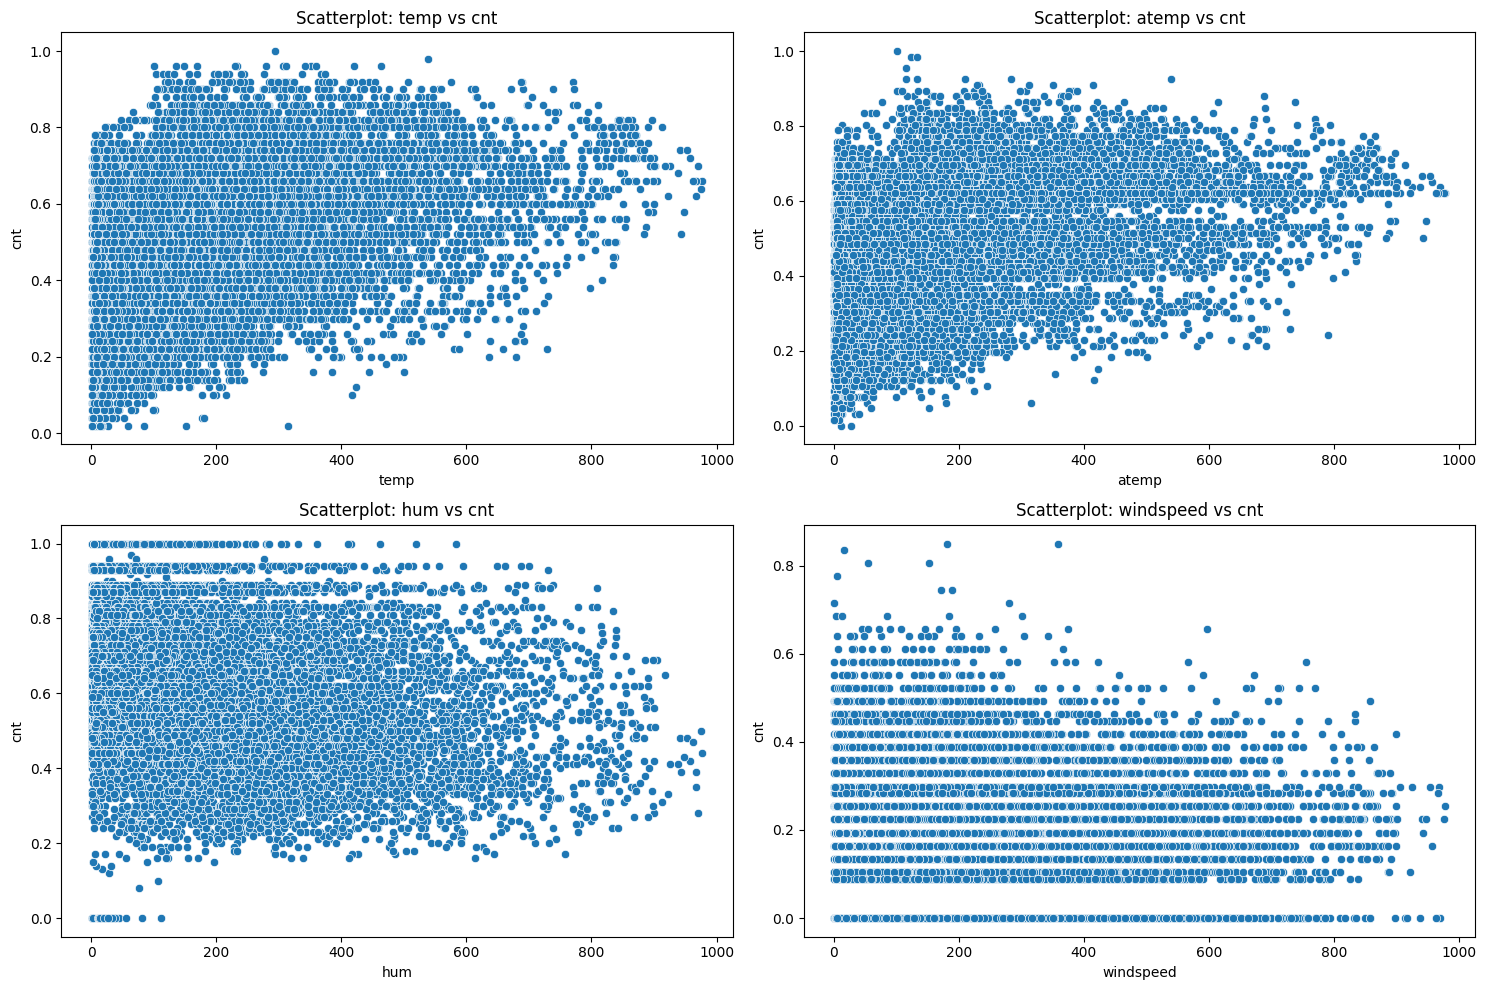

In [254]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

for var, subplot in zip(data_numerical, ax.flatten()):
    sns.scatterplot(x=data['cnt'], y=data_numerical[var], ax=subplot)
    subplot.set_title(f'Scatterplot: {var} vs cnt')
    subplot.set_xlabel(var)
    subplot.set_ylabel('cnt')

plt.tight_layout()
plt.show()

**Завдання 12** побудуйте графіки співвідношення `boxplot`[boxplot](https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html) між категоріальними змінними і цільовою змінною `cnt`.

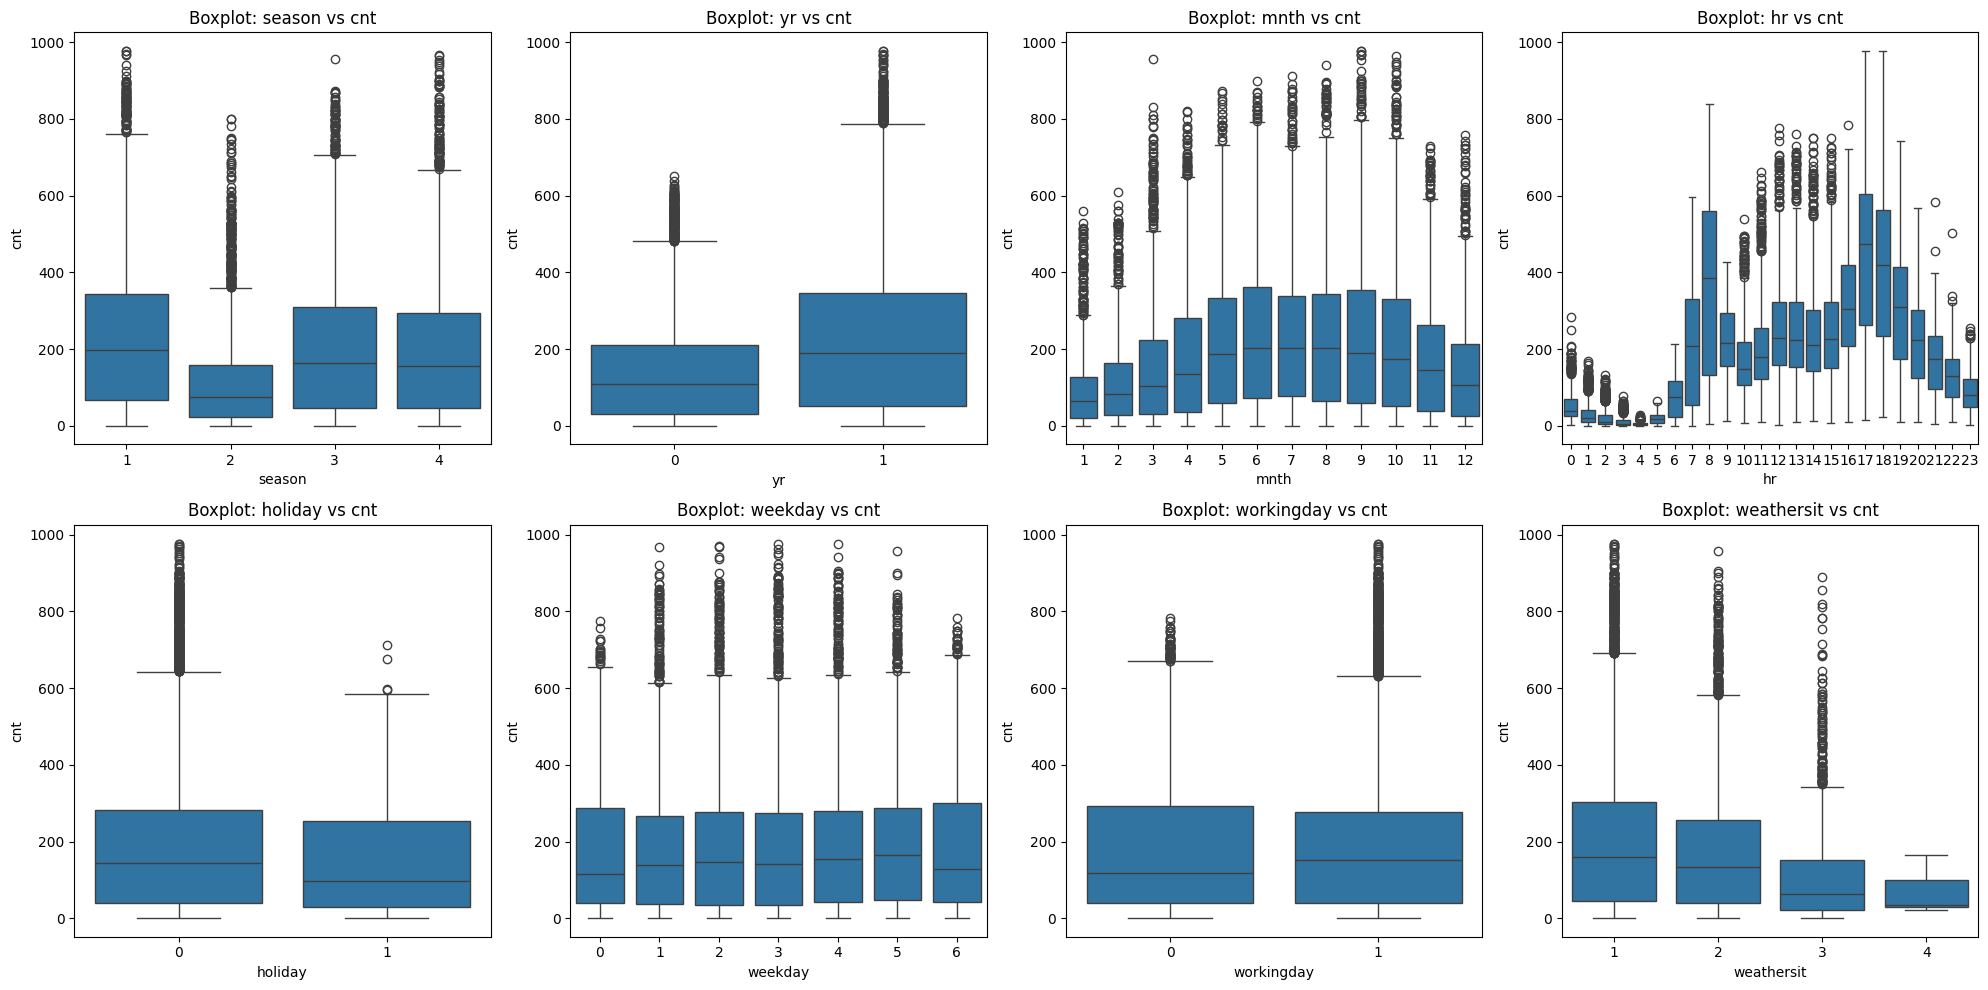

In [255]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))

for var, subplot in zip(data_categorical.columns, ax.flatten()):
    sns.boxplot(x=data_categorical[var], y=data['cnt'], ax=subplot)
    subplot.set_title(f'Boxplot: {var} vs cnt')
    subplot.set_xlabel(var)
    subplot.set_ylabel('cnt')

plt.tight_layout()
plt.show()

**Висновки з 11-12 завдання (детальні)**

1. На діаграмах розсіювання видна нелінійна залежність між змінними. 
2. Графіки boxplot показують присутність великої кількості аномалій.
3. Найбільше викликів зранку (7-8 години) і ввечері (17-19 години).
4. В зимові місяці викликів зазвичай дещо менше.



**Завдання 13** Побудувати матрицю кореляції:  

1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти  
3.   Вирахувати кореляційні коефіціенти для набору данних за методом Спірмана
4.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

5. Описати отримані результати, спираючись на значення коефіціентів кореляції та пояснити в чому відмінність обраних методів.

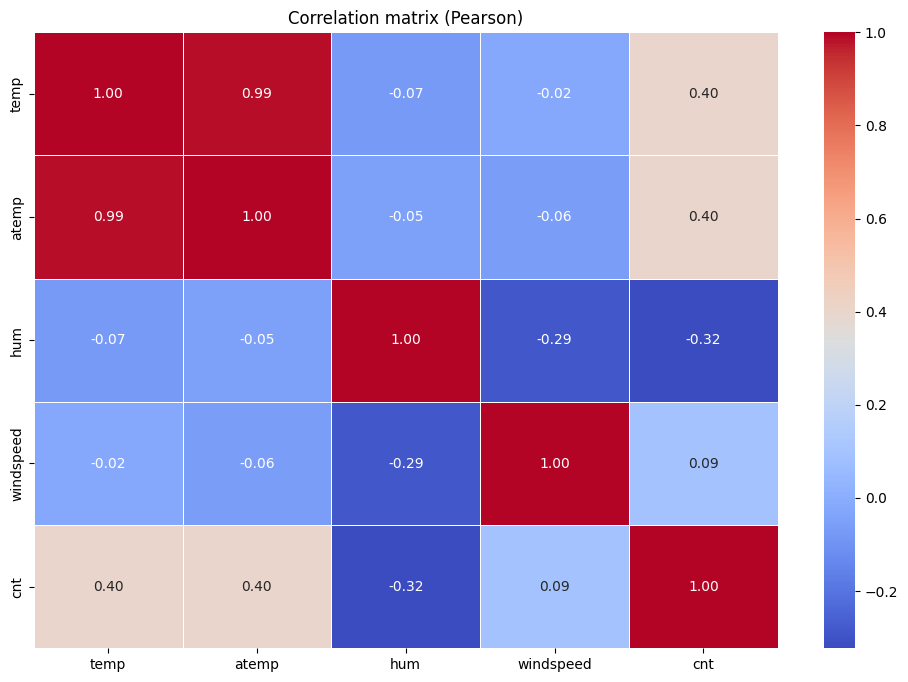

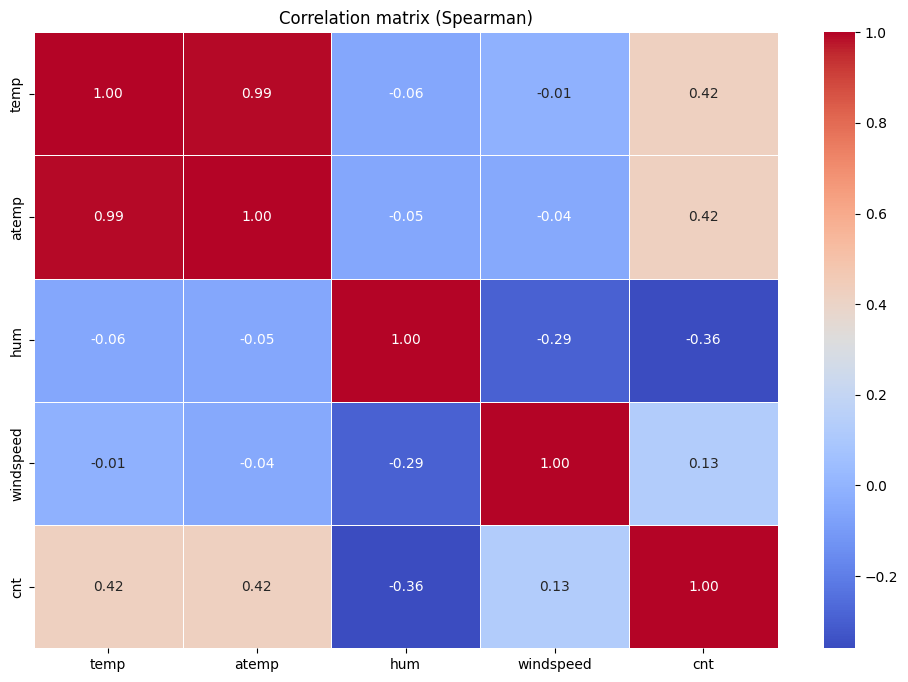

In [256]:
data_numerical['cnt'] = data['cnt']

correlation_pearson = data_numerical.corr(method='pearson')

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_pearson, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation matrix (Pearson)")
plt.show()

correlation_spearman = data_numerical.corr(method='spearman')

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_spearman, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation matrix (Spearman)")
plt.show()

Висновки:

1. Кореляція Пірсона вимірює лінійний зв'язок між двома змінними, а Спірмана - монотонний. На матрицях видна значна кореляція між atemp і temp. Це пов'язано з тим, що відчутна температура відрізняється від фактичної дуже незначно. Є деяка негативна кореляція між вологістю і швидкістю вітру.
2. Є деяка кореляція між кількістю викликів і температурою.


**Завдання 14** 
1. побудувати модель лінійної регресії:
2. видалити змінні, які НЕ є релевантними;

3. поділити вибірку на `train`, `test` та `validation` в пропорції `70/30`;  

4. провести навчання моделі лінійної регресії;

1. Для подальшої роботи з моделями для кожної категоріальної змінної ми створимо фіктивні змінні, щоб уникнути неправильного порядку категорій. [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [257]:
def get_dummies(df: pd.DataFrame, categorical_columns: list):
    features = df.copy()

    for col in categorical_columns:
        features = pd.concat([features, pd.get_dummies(features[col], prefix=col)], axis=1)
        
    return features

In [258]:
features = get_dummies(data, categorical_columns)

2. На основі змінної часу створіть нову змінну, яка відповідатиме за день і ніч.

In [259]:
features['night_hours'] = features['hr'].apply(lambda x: 1 if x >= 0 and x < 6 else 0)
features = features.drop(categorical_columns, axis=1)

**Модель лінійної регрессії  

[train_linear_model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Після отримання фіктивних змінних потрібно видалити по одній з кожної категорії, щоб запобігти мультиколінеарності. Також видаляємо ще два атрибути `date` та `atemp` - поясніть чому?

In [260]:
features = features.drop(['season_1', 'yr_0', 'mnth_1', 'hr_0', 'holiday_0', 'weekday_0', 'workingday_0', 'weathersit_1', 'atemp', 'date'], axis=1)

In [261]:
def get_train_data(df: pd.DataFrame, target: str, test_size: float):
    X = df.drop(target, axis=1)
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, shuffle=True)
    return X_train, X_test, y_train, y_test

In [262]:
X_train, X_test, y_train, y_test = get_train_data(features, 'cnt', 0.3)

In [263]:
def train_linear_model(X_train, y_train):
  model = LinearRegression()
  model.fit(X_train, y_train)
  return model

model = train_linear_model(X_train, y_train)

In [264]:
# predict
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
# scores
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 10448.098, test: 10101.710
R^2 train: 0.688, test: 0.680


Оскільки в нашій моделі є багато незалежних змінних, ми не можемо відобразити їх залежність у двовимірному просторі, але ми можемо побудувати графік взаємозв'язку між залишками моделі та передбачуваними значеннями, що також допоможе нам оцінити якість моделі.

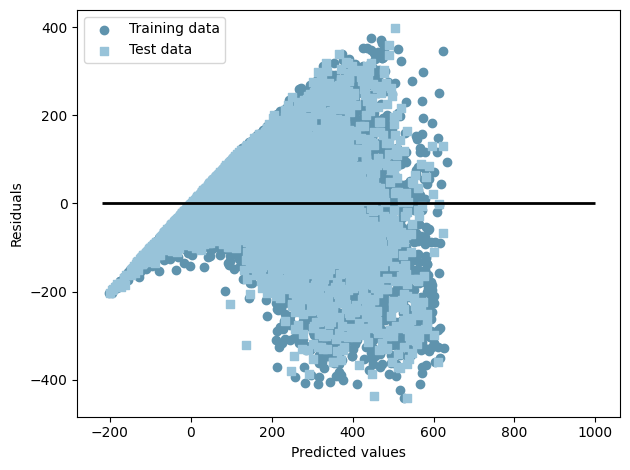

In [265]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='#5f93ad', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='#98c3d9', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-220, xmax=1000, lw=2, color='#000000')
plt.tight_layout()

**Висновки з завдання (детальні)**

Лінійних взаємозв'язків немає, є підтвердження нелінійної залежності. atemp видаляємо, щоб позбутися мультиколінеарності з temp, а date не має значення.
